#### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [2]:
df = pd.read_csv('datasets/contraceptive.csv')

In [3]:
df.head(5)

,Wife_age,Wife_education,Husband_education,Children,Wife_religion,Wife_working,Husband_occupation,Standard-of-living,Media_exposure,Contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife_age              1473 non-null   int64
 1   Wife_education        1473 non-null   int64
 2   Husband_education     1473 non-null   int64
 3   Children              1473 non-null   int64
 4   Wife_religion         1473 non-null   int64
 5   Wife_working          1473 non-null   int64
 6   Husband_occupation    1473 non-null   int64
 7   Standard-of-living    1473 non-null   int64
 8   Media_exposure        1473 non-null   int64
 9   Contraceptive_method  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB
Number of duplicated rows is:  48
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

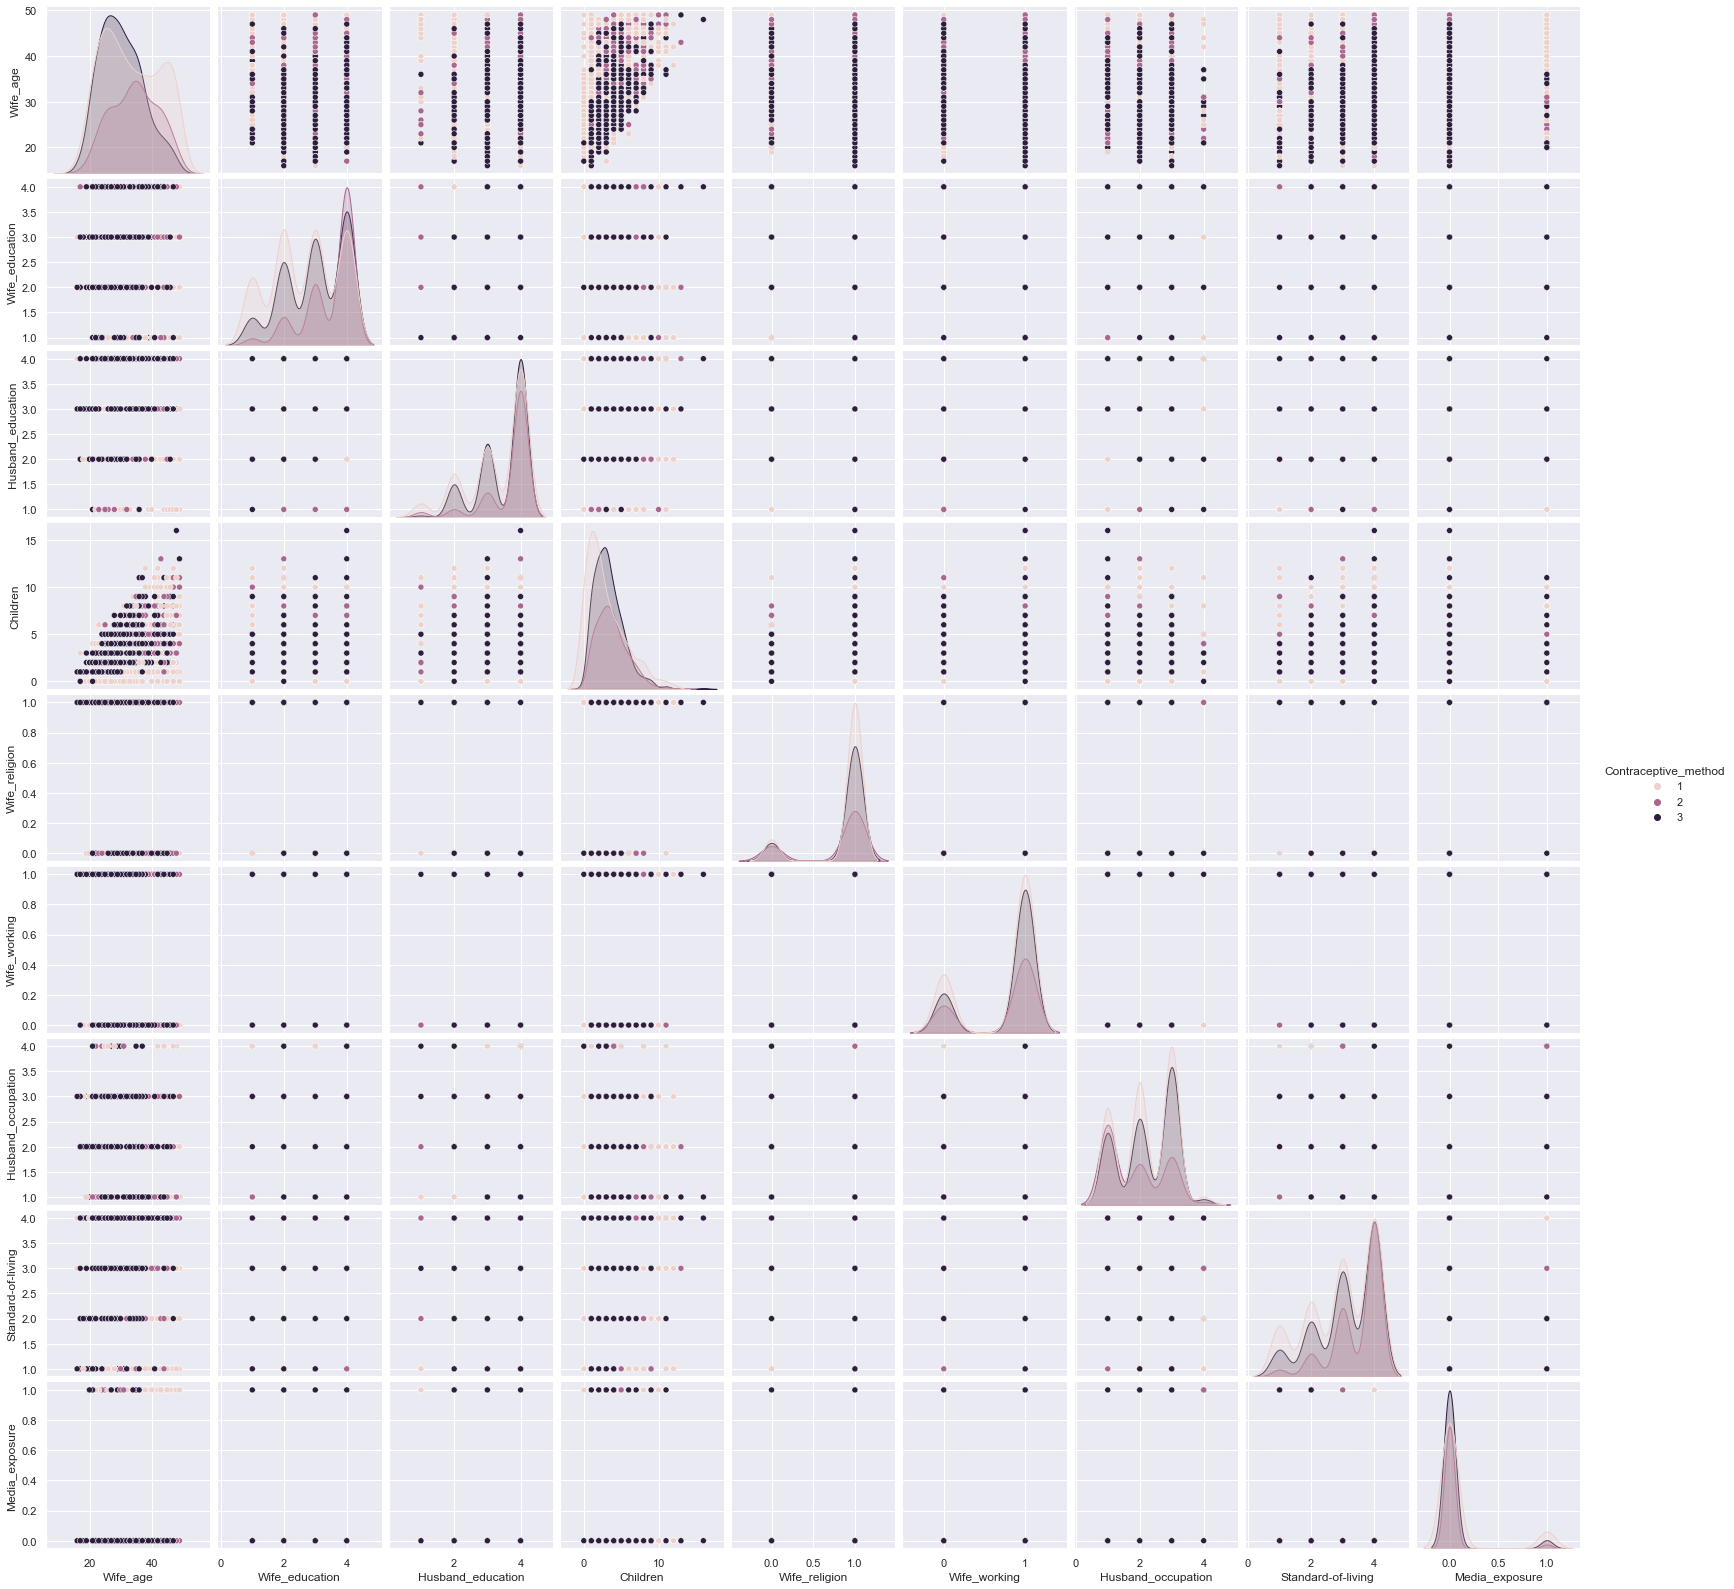

In [5]:
sns.pairplot(df, hue='Contraceptive_method')
plt.show()

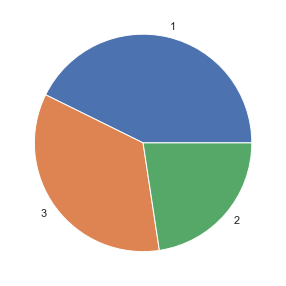

In [6]:
y =df['Contraceptive_method']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [7]:
X = df.drop(columns=['Contraceptive_method'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wife_age,1473.0,32.538357,8.227245,16.0,26.0,32.0,39.0,49.0
Wife_education,1473.0,2.958588,1.014994,1.0,2.0,3.0,4.0,4.0
Husband_education,1473.0,3.429735,0.816349,1.0,3.0,4.0,4.0,4.0
Children,1473.0,3.261371,2.358549,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473.0,0.850645,0.356559,0.0,1.0,1.0,1.0,1.0
Wife_working,1473.0,0.749491,0.433453,0.0,0.0,1.0,1.0,1.0
Husband_occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard-of-living,1473.0,3.133741,0.976161,1.0,3.0,3.0,4.0,4.0
Media_exposure,1473.0,0.073999,0.261858,0.0,0.0,0.0,0.0,1.0


#### Standardize the Data

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wife_age,1473.0,2.990743e-16,1.00034,-2.010877,-0.794990,-0.065458,0.785662,2.001549
Wife_education,1473.0,3.135457e-17,1.00034,-1.930310,-0.944748,0.040814,1.026376,1.026376
Husband_education,1473.0,2.381741e-16,1.00034,-2.977356,-0.526590,0.698793,0.698793,0.698793
Children,1473.0,-7.235669e-18,1.00034,-1.383257,-0.959123,-0.110856,0.313277,5.402879
Wife_religion,1473.0,-1.615966e-16,1.00034,-2.386515,0.419021,0.419021,0.419021,0.419021
Wife_working,1473.0,-6.994480e-17,1.00034,-1.729702,-1.729702,0.578134,0.578134,0.578134
Husband_occupation,1473.0,-1.929512e-16,1.00034,-1.316056,-1.316056,-0.159403,0.997250,2.153903
Standard-of-living,1473.0,1.543609e-16,1.00034,-2.186593,-0.137053,-0.137053,0.887716,0.887716
Media_exposure,1473.0,9.647559e-18,1.00034,-0.282687,-0.282687,-0.282687,-0.282687,3.537480


#### Observations and Variables

In [9]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

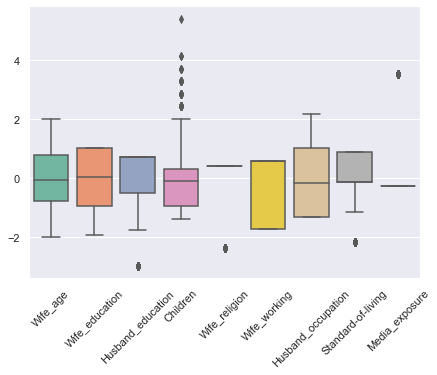

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

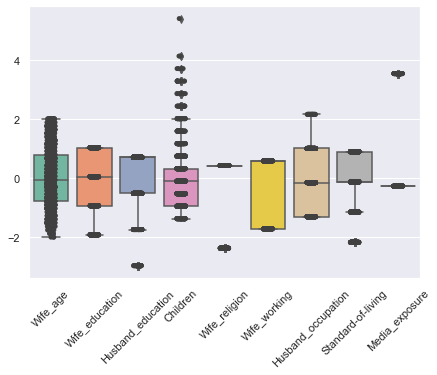

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

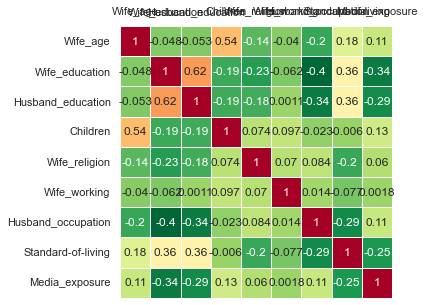

In [12]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [13]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [14]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.779220,-0.782663,-0.691800,-0.081334,-0.165445,0.312127,0.764008,-0.356555
1,1.793558,2.757226,-0.773233,-0.081698,-1.918382,0.638228,-0.554349,-0.144025
2,1.066079,1.766469,-0.597610,0.007157,-1.516619,0.722205,-0.468070,0.117860
3,1.710007,2.004488,-0.709393,-0.012780,-1.477533,-0.437812,-0.320087,-0.987516
4,1.441100,0.950774,-0.909547,0.118327,-0.883761,-1.250288,-0.880181,-0.654242
...,...,...,...,...,...,...,...,...
1468,-1.492293,-0.258456,1.125729,-1.366927,-0.059486,0.234075,-0.546361,0.075172
1469,-1.683081,0.316458,-0.997576,-0.424338,0.553022,0.352361,0.252700,-0.131685
1470,-0.359815,2.209505,0.728339,-1.862805,-0.350074,-0.212341,0.401766,-1.111796
1471,0.589131,-0.062478,1.063485,-1.304995,-0.031956,-1.324642,0.135557,-0.187801


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (27.9% expl.var)', ylabel='PC2 (18.5% expl.var)'>)

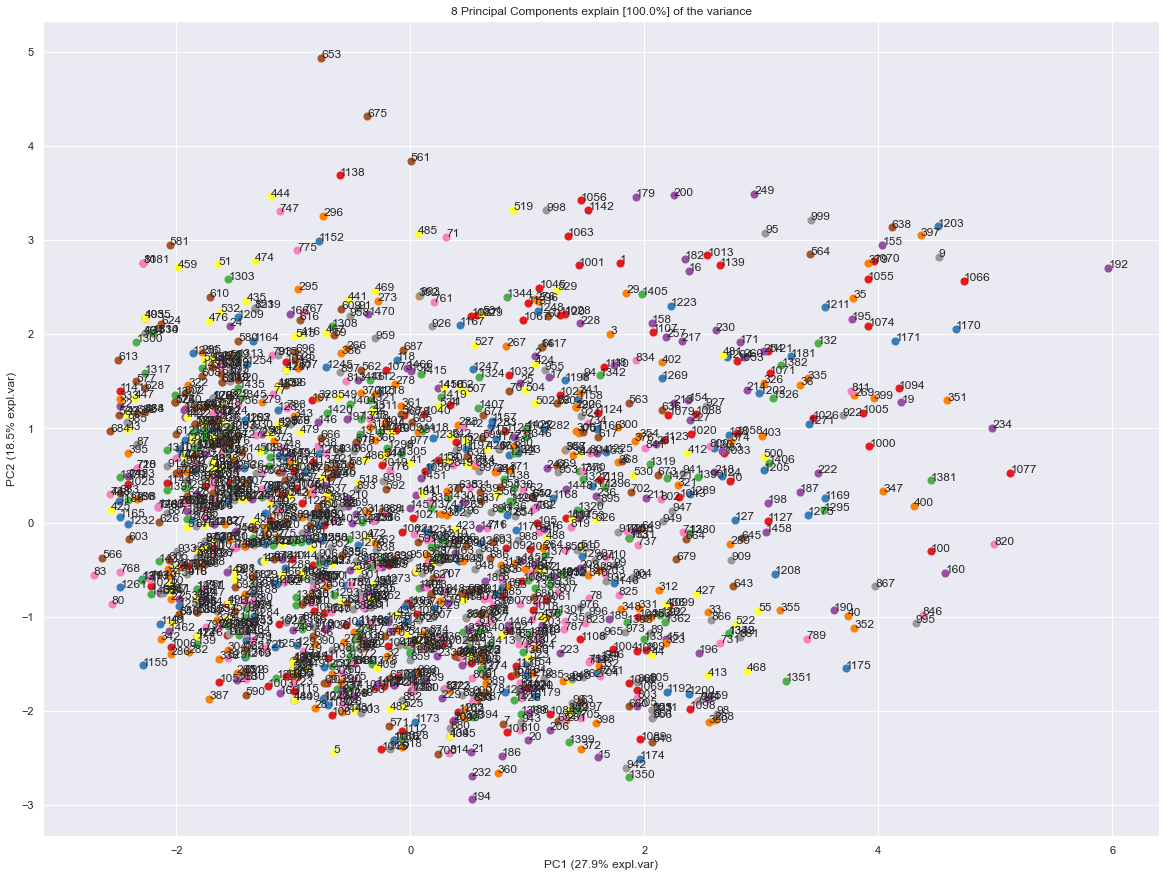

In [15]:
model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

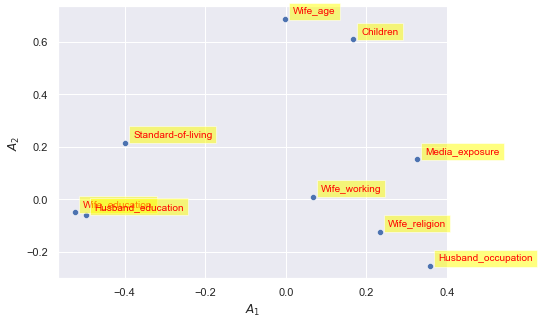

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

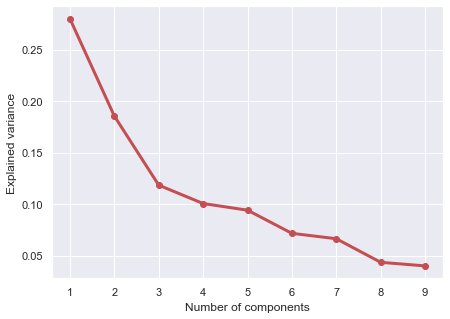

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

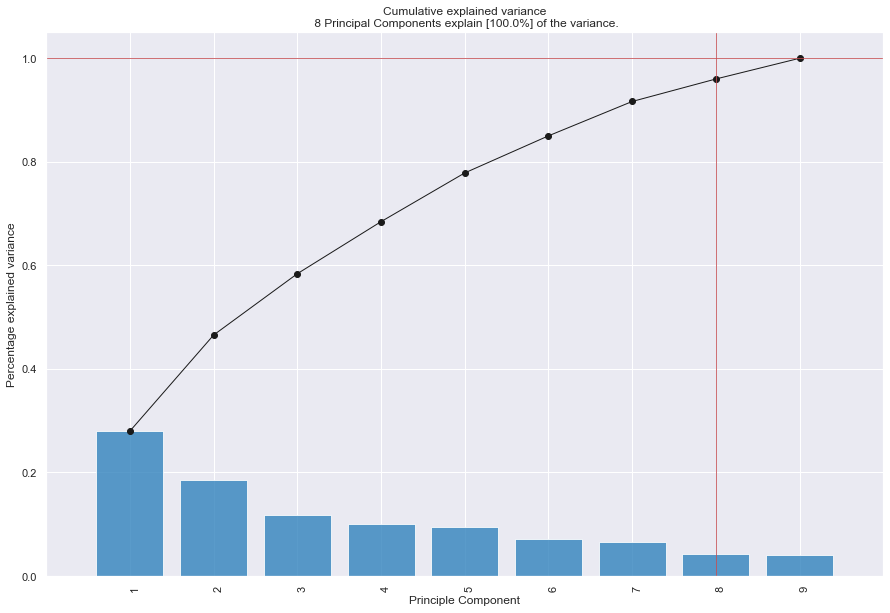

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();